# EDA Student Performance Indicator
### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.
### 3) Dataset Information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,* some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data set
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

# Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

After making each check, you try to write your observations and keyinsights. Because stakeholders do not worry about code, they worry about observations.

In [4]:
# Check Missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Insights or Observations
there are no missing values

In [5]:
# Check duplicates
df.duplicated().sum()

0

### Insights or Observations
there are no duplicate records

In [6]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Check no. of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
# Checking the descriptive statistics of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights or Observation
* From the above description of numerical data,all means are very close to each other- between 66 and 69
* All the standard deviation are also close- between 14.6- 15.19
* While there is a minimum of 0 for maths,other are having 17 and 10 value

In [9]:
# checking the various categories in all the categorical columns
# Get a list of categorical column names
categorical_columns = [i for i in df.columns if df[i].dtype=='O']
# Loop through each categorical column and print unique values
for column in categorical_columns:
    print(column, df[column].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


### Explore more info about the data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Segregate numerical and categorical features
numerical_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
numerical_features, categorical_columns

(['math score', 'reading score', 'writing score'],
 ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In dataset we have math_score, reading_score, writing_score. But we do not have total_score and average_score.

First we will create the 2 features.

Then we will compare with categorical variables. This is because we want to analyze that is there any impact on categorical variables.

In [12]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Explore Visualization

<Axes: xlabel='average', ylabel='Count'>

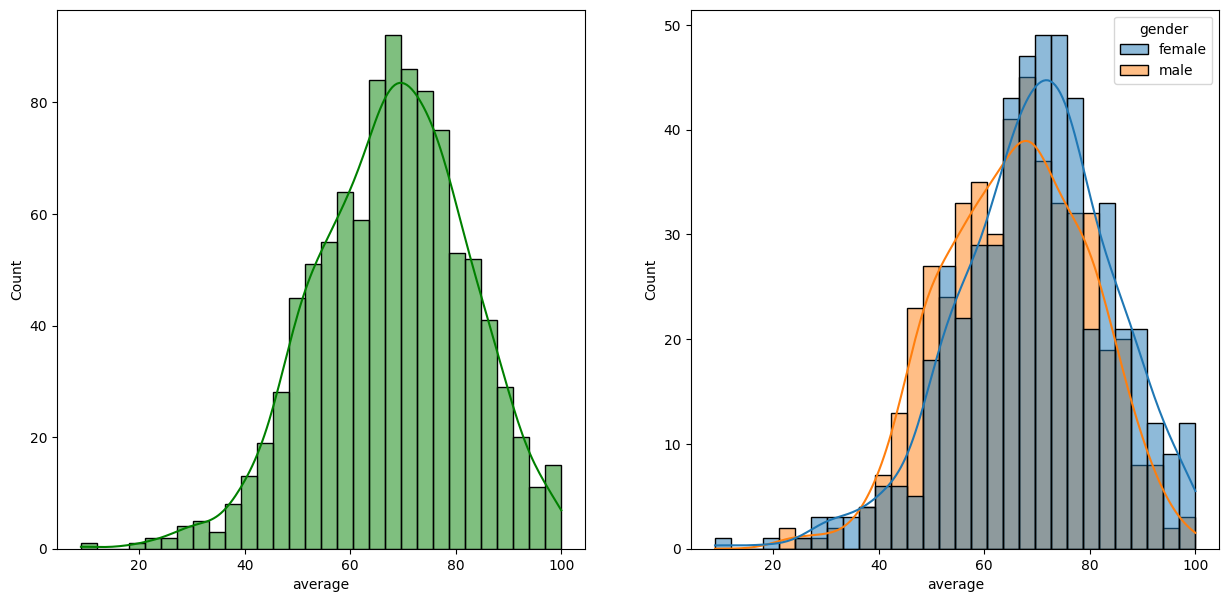

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

### Insights and Observations
* Female student tend to perform well than male students

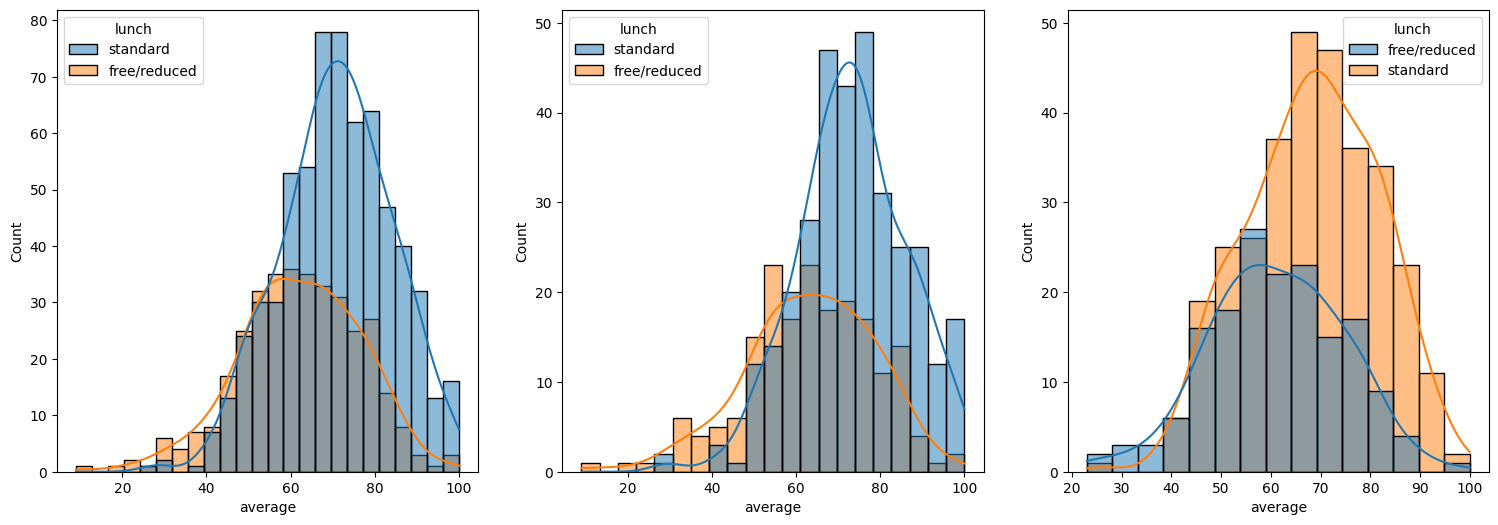

In [17]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.show()

### Insights or Observation
* Standard Lunch help students perform well in exams in the case of male and female.

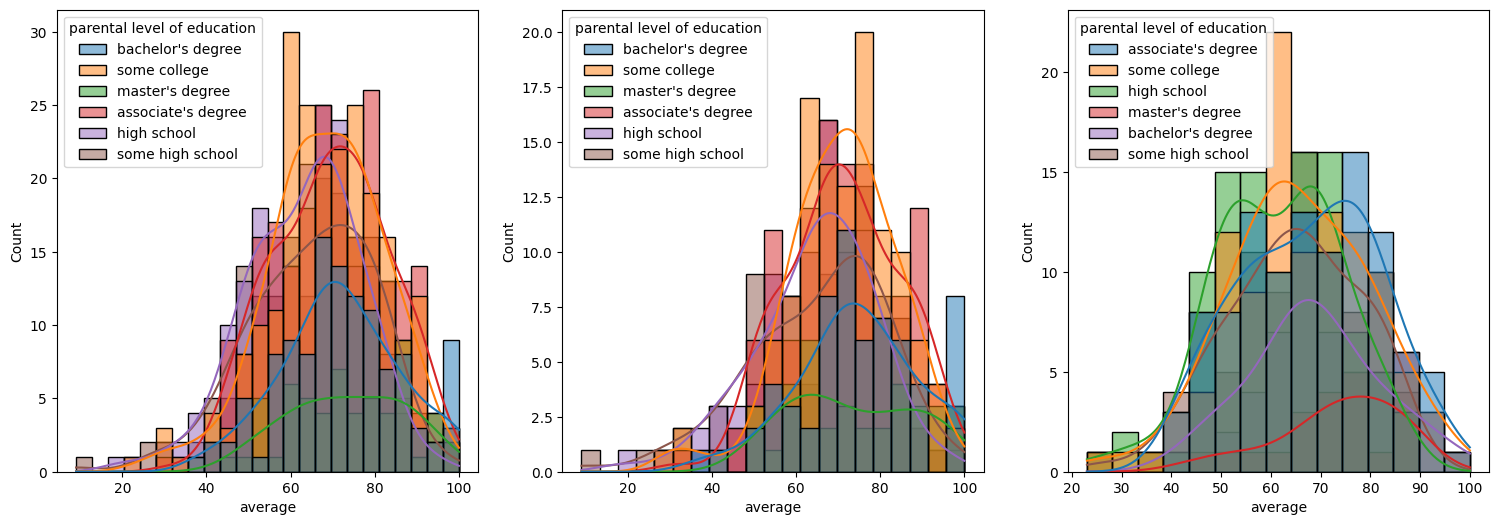

In [20]:
# Impact of parental level of education on marks
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x='average', kde=True, hue='parental level of education')
plt.show()

### Insights
* In general parent's education don't help student perform well in exam
* 2nd plot we can see there is no effect of parent's education on female students
* 3rd plot shows that parent's whose education is of associate's degree their male child tend to perform well in exam

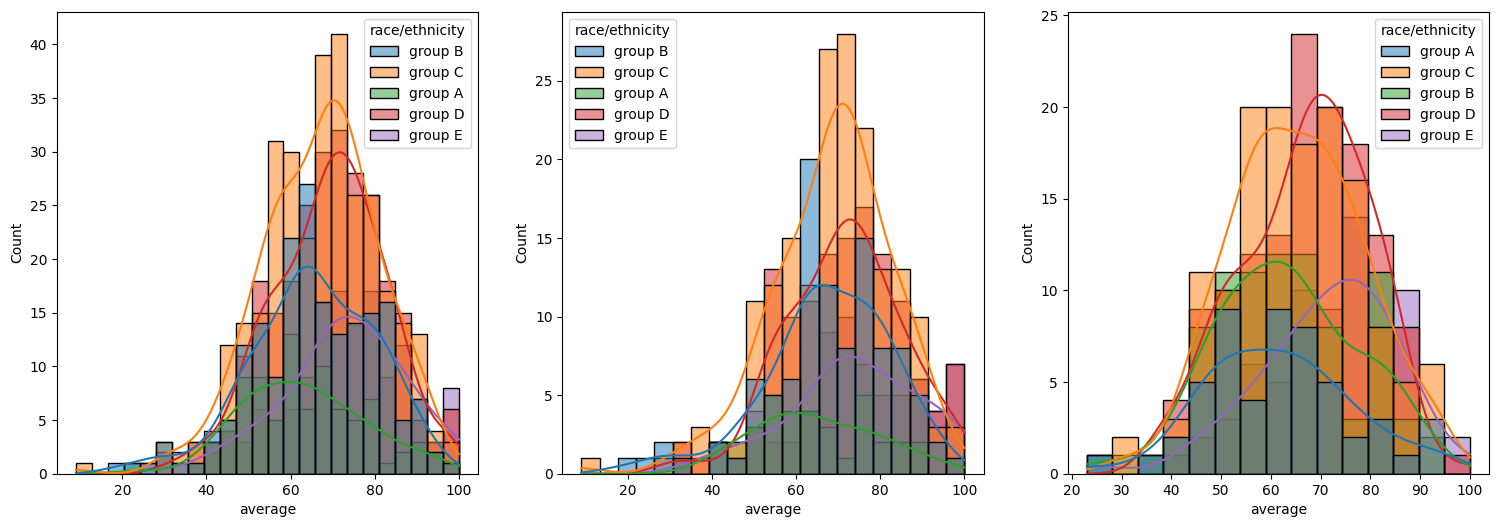

In [21]:
# Impact of parental level of education on marks
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x='average', kde=True, hue='race/ethnicity')
plt.show()

### Insights
* Students of Group A and B perform badly in exam

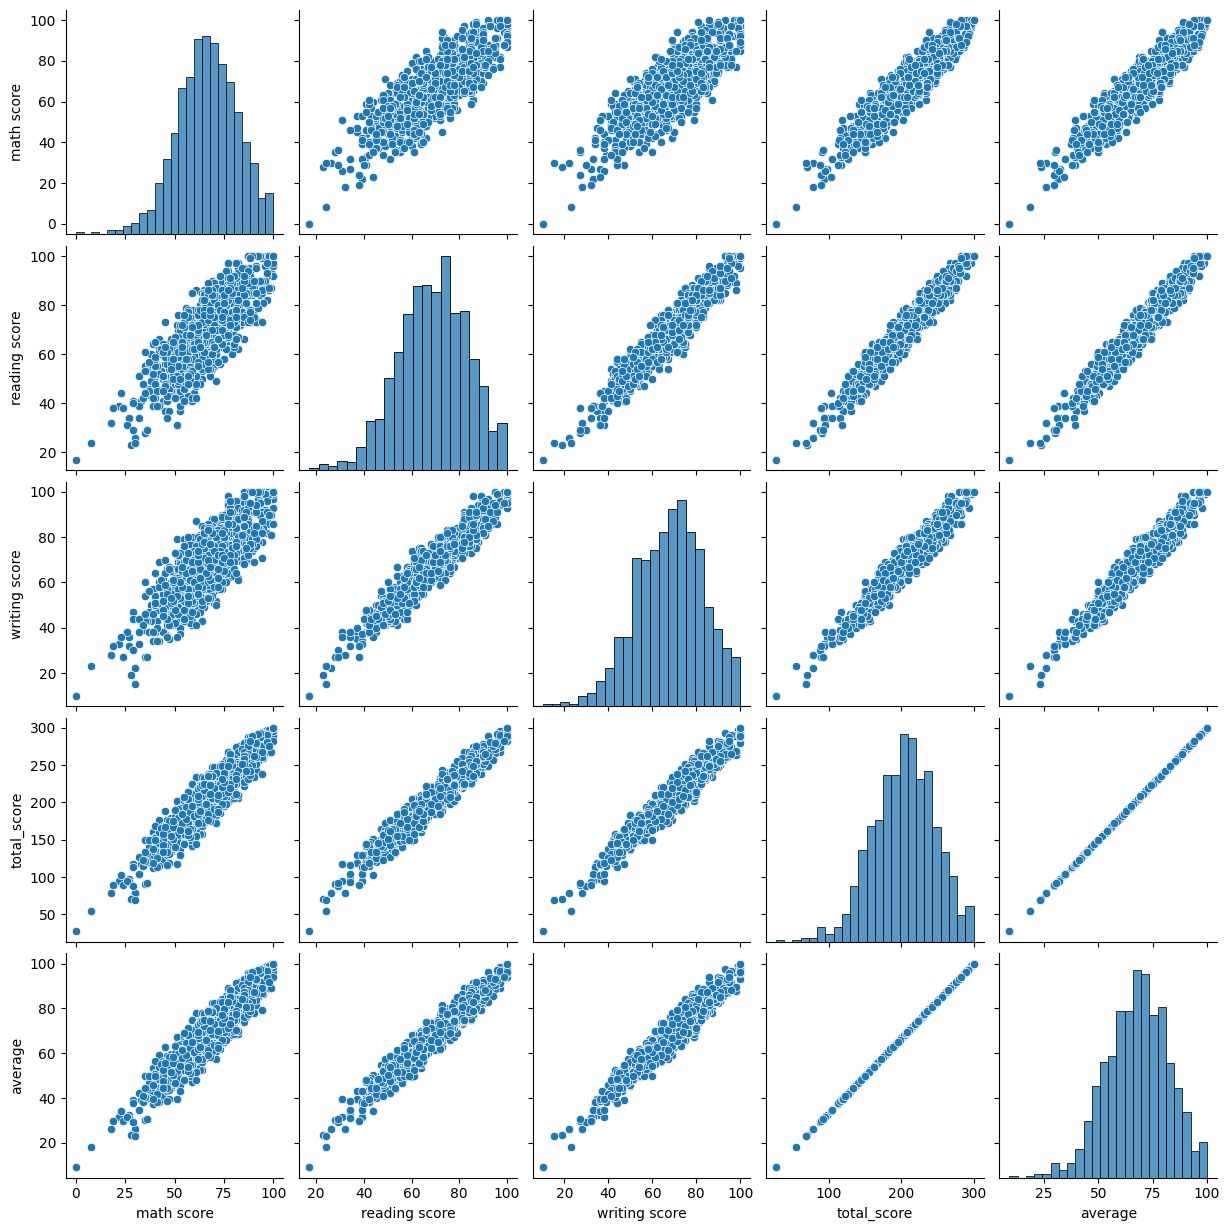

In [22]:
sns.pairplot(df)

<Axes: >

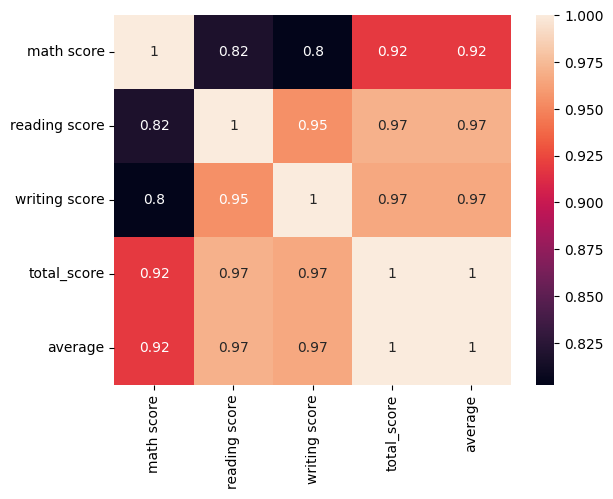

In [27]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)